<a href="https://colab.research.google.com/github/a3s0h/stock_price_predictions/blob/main/StockPricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=("369cb75786596bff94626331ed73921581f7dacd"))
df.head()

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-01-30 00:00:00+00:00  166.97  167.37  164.70  165.53  45137026   
       2018-01-31 00:00:00+00:00  167.43  168.44  166.50  166.87  30984099   
       2018-02-01 00:00:00+00:00  167.78  168.62  166.76  167.17  38099665   
       2018-02-02 00:00:00+00:00  160.50  166.80  160.10  166.00  85436075   
       2018-02-05 00:00:00+00:00  156.49  163.88  156.00  159.10  66090446   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-01-30 00:00:00+00:00  39.640986  39.735952  39.102057  39.299110   
       2018-01-31 00:00:00+00:00  39.750196  39.989984  39.529402  39.617245   
       2018-02-01 00:00:00+00:00  39.833291  40.032719  39.591129  39.688469   
       2018-02-02 00:00:00+00:00  38.104919  39.600626  38.009953  39.410695   
       2018-02-05 00:00:00+00:00  37.152889  38.907377  37.036556  37.772539   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-01-30 00:00:00+00:00  180548104      0.0          1.0  
       2018-01-31 00:00:00+00:00  123936396      0.0          1.0  
       2018-02-01 00:00:00+00:00  152398660      0.0          1.0  
       2018-02-02 00:00:00+00:00  341744300      0.0          1.0  
       2018-02-05 00:00:00+00:00  264361784      0.0          1.0

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('AAPL.csv')


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-01-23 00:00:00+00:00,141.11,143.315,137.90,138.120,81760313,141.11,143.315,137.90,138.120,81760313,0.0,1.0
1254,AAPL,2023-01-24 00:00:00+00:00,142.53,143.160,140.30,140.305,66435142,142.53,143.160,140.30,140.305,66435142,0.0,1.0
1255,AAPL,2023-01-25 00:00:00+00:00,141.86,142.430,138.81,140.890,65799349,141.86,142.430,138.81,140.890,65799349,0.0,1.0
1256,AAPL,2023-01-26 00:00:00+00:00,143.96,144.250,141.90,143.170,54105068,143.96,144.250,141.90,143.170,54105068,0.0,1.0
1257,AAPL,2023-01-27 00:00:00+00:00,145.93,147.230,143.08,143.155,70555843,145.93,147.230,143.08,143.155,70555843,0.0,1.0


In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-30 00:00:00+00:00,166.97,167.37,164.70,165.53,45137026,39.640986,39.735952,39.102057,39.299110,180548104,0.0,1.0
1,AAPL,2018-01-31 00:00:00+00:00,167.43,168.44,166.50,166.87,30984099,39.750196,39.989984,39.529402,39.617245,123936396,0.0,1.0
2,AAPL,2018-02-01 00:00:00+00:00,167.78,168.62,166.76,167.17,38099665,39.833291,40.032719,39.591129,39.688469,152398660,0.0,1.0
3,AAPL,2018-02-02 00:00:00+00:00,160.50,166.80,160.10,166.00,85436075,38.104919,39.600626,38.009953,39.410695,341744300,0.0,1.0
4,AAPL,2018-02-05 00:00:00+00:00,156.49,163.88,156.00,159.10,66090446,37.152889,38.907377,37.036556,37.772539,264361784,0.0,1.0


In [ ]:
df1=df.reset_index()['adjClose']


In [ ]:
df1

0        39.640986
1        39.750196
2        39.833291
3        38.104919
4        37.152889
           ...    
1253    141.110000
1254    142.530000
1255    141.860000
1256    143.960000
1257    145.930000
Name: adjClose, Length: 1258, dtype: float64

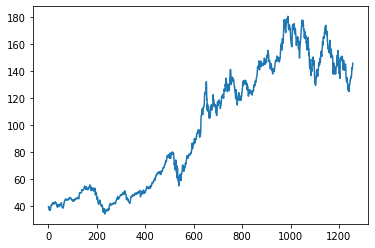

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1.shape)


(1258, 1)


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
print(test_data)

[[0.66679614]
 [0.65316501]
 [0.66045294]
 [0.62880441]
 [0.63049143]
 [0.64155829]
 [0.64621447]
 [0.62350259]
 [0.61714867]
 [0.59592387]
 [0.61079475]
 [0.62755828]
 [0.61958208]
 [0.60998361]
 [0.60890209]
 [0.62661195]
 [0.61390411]
 [0.62519246]
 [0.62384056]
 [0.62350259]
 [0.61289019]
 [0.60836133]
 [0.6061307 ]
 [0.6114031 ]
 [0.60112868]
 [0.61701348]
 [0.61708107]
 [0.62275904]
 [0.62539525]
 [0.61850057]
 [0.62688233]
 [0.64803954]
 [0.64236157]
 [0.64580891]
 [0.65689447]
 [0.64790435]
 [0.66034181]
 [0.67169775]
 [0.66980509]
 [0.66784484]
 [0.665817  ]
 [0.67710534]
 [0.68758255]
 [0.69184103]
 [0.69393647]
 [0.7121195 ]
 [0.72604405]
 [0.74328075]
 [0.73429063]
 [0.74693087]
 [0.74280758]
 [0.7505134 ]
 [0.77423921]
 [0.76971035]
 [0.75558302]
 [0.72895063]
 [0.75396074]
 [0.74889113]
 [0.75835441]
 [0.77025111]
 [0.77315769]
 [0.75815163]
 [0.74605214]
 [0.7505134 ]
 [0.75200049]
 [0.74970226]
 [0.76213973]
 [0.75936833]
 [0.76011188]
 [0.75538024]
 [0.75504175]
 [0.75

In [ ]:
training_size,test_size
test_data.shape

(441, 1)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(32,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics =['mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 303ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 2/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 5/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 6/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 7/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 8/100
12/12 [==============================] - 2s 178ms/step - 

In [ ]:
import tensorflow as tf
# from sklearn.metrics import accuracy_score

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 35ms/step


In [ ]:
# print(accuracy_score(test_predict,ytest))

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
print(model.evaluate(X_test,ytest))


11/11 [==============================] - 0s 33ms/step - loss: 8.2812e-04 - mse: 8.2812e-04
[0.0008281216723844409, 0.0008281216723844409]


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

80.87857861062518

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

151.9600264905017

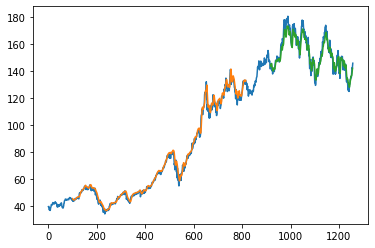

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)
# print(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
len(x_input)

1

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(len(temp_input))

100


In [ ]:


lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.75238407]
101
1 day input [0.82776604 0.81755472 0.83736468 0.8786184  0.81333404 0.82334113
 0.80332695 0.79195835 0.81769087 0.83416513 0.81251714 0.80584574
 0.79012031 0.79243488 0.79917435 0.78610386 0.73600033 0.70686404
 0.7357961  0.76064364 0.76268591 0.75608259 0.7197303  0.72197679
 0.71217392 0.70781709 0.73947218 0.70808939 0.7355238  0.74464591
 0.74539474 0.74219519 0.76860847 0.78344892 0.80312272 0.78276816
 0.75179383 0.82626838 0.80993027 0.79161797 0.75335957 0.71149317
 0.70965513 0.71333731 0.71729225 0.68572093 0.76754725 0.78684462
 0.77716184 0.78916304 0.78063946 0.79379986 0.79768661 0.77532075
 0.79011768 0.79618646 0.77600264 0.74947727 0.72867975 0.77545713
 0.77736641 0.77395698 0.76591072 0.74054456 0.72711141 0.73877166
 0.73543042 0.75131836 0.75800085 0.74259022 0.69683567 0.68326614
 0.66867378 0.66819646 0.68967587 0.66771914 0.66633287 0.65383858
 0.62659693 0.65097104 0.65315583 0.61997427 0.62878172 0.6196329
 0.65103931 0.65465788 0.65861781 

In [ ]:
# day_new=np.arange(1,151)
# day_pred=np.arange(151,181)

In [ ]:
# day_pred.shape

(30,)

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
len(df1)


1258

In [ ]:
# plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
print(58+30)

88


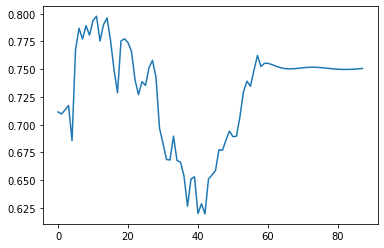

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:]) 


In [ ]:
df3=scaler.inverse_transform(df3).tolist()


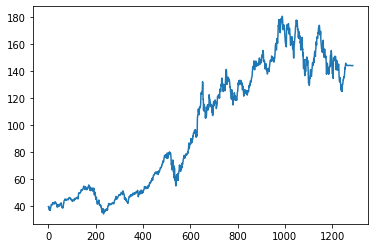

In [ ]:
plt.plot(df3)


In [ ]:
# final_data = scaler.inverse_transform(test_data)
#print(final_data)

**Predicting Values**:

In [ ]:
#final model
g_input=test_data[341:].reshape(1,-1)
# g_input.shape
# print(g_input)

final_input=list(g_input)
final_input=final_input[0].tolist()
# print(len(final_input))

from numpy import array
def predictor(duration,final_input,g_input):
  lst_output=[]
  n_steps=100
  i=0
  while(i<duration):
      
      if(len(final_input)>100):
          #print(temp_input)
          g_input=np.array(final_input[1:])
          # print("{} day input {}".format(i,x_input))
          g_input=g_input.reshape(1,-1)
          g_input = g_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(g_input, verbose=0)
          # print("{} day output {}".format(i,yhat))
          # yhat=scaler.inverse_transform(yhat)
          # yhat = yhat.reshape(1,-1)
          final_input.extend(yhat[0].tolist())
          final_input=final_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          g_input = g_input.reshape((1, n_steps,1))
          yhat = model.predict(g_input, verbose=0)
          # print(yhat[0])
          # yhat=scaler.inverse_transform(yhat)
          # yhat = yhat.reshape(1,-1)
          final_input.extend(yhat[0].tolist())
          # print(len(final_input))
          lst_output.extend(yhat.tolist())
          i=i+1
  return lst_output

#predicting values

duration =int(input("Enter the no. of duration to predict : "))
prediction = predictor(duration,final_input,g_input)
print("Predicted values are : ",prediction)

Enter the no. of duration to predict : 10
Predicted values are :  [[0.7523840665817261], [0.7552986145019531], [0.755302906036377], [0.7542895078659058], [0.7530474066734314], [0.7519096732139587], [0.7510374188423157], [0.7504963874816895], [0.7502827644348145], [0.7503405809402466]]


In [ ]:
import matplotlib.pyplot as plt

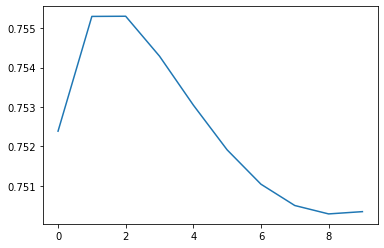

In [ ]:
plt.plot(prediction)
plt.show()

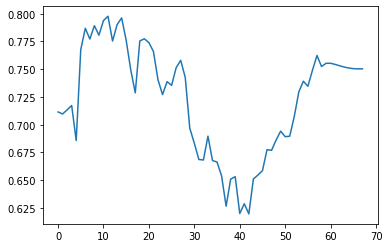

In [ ]:
df3=df1.tolist()
df3.extend(prediction)
plt.plot(df3[1200:]) 

In [ ]:
# import pickle 
# pickle.out = open("Model.pkl",'wb')
# pickle.dump(model,pickle.out)
# pickle.out.close()

In [ ]:
# pickle.dump(test_data,open('test_data.pkl','wb'))
